In [1]:
import sympy
import math
import numpy as np
import re

In [2]:
[a,omega,t,lamda,x,phi,c]=sympy.symbols('a omega t lamda x phi c')
sine_wave=a*sympy.sin(omega*t-(2*sympy.pi/lamda)*x+phi)+c
sympy.init_printing()
print(sine_wave)

a*sin(omega*t + phi - 2*pi*x/lamda) + c


In [3]:
string_list=re.split("[\s|,]+","a omega lamda phi c x t z")
string=""
for index,piece in enumerate(string_list):
    if index ==0:
        string+=piece
    else:
        string+=" "+piece
print string

a omega lamda phi c x t z


In [4]:
for parameter in string_list:
    globals()[parameter]=sympy.symbols(parameter)

In [5]:
equation=a*sympy.sin(omega*t-(2*sympy.pi/lamda)*x+phi)+c

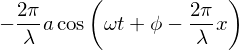

In [6]:
sympy.diff(equation,x)

In [7]:
# a simple sqrt
sympy.sqrt(x)

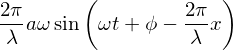

In [8]:
# a derivative
sympy.diff(sympy.diff(sine_wave,'t'),x)

In [9]:
sine_wave.evalf(subs={a:10,omega:10**-1,t:1,x:1,lamda:10**-3,phi:math.pi/2,c:.1})

In [10]:
sine_function=sympy.lambdify(x,sine_wave.subs({a:10,omega:10**-1,t:1,lamda:10**-3,phi:math.pi/2,c:.1}),'numpy')

In [11]:
sine_function(1)

In [12]:
sine_function((np.linspace(-1,1,100)))

array([ 10.05004165,   4.00768164,  -7.52950106,  -8.33839027,
         2.71844104,  10.09332727,   3.41600392,  -7.92414901,
        -7.98107059,   3.32527998,  10.09637328,   2.81097383,
        -8.28648654,  -7.59121129,   3.91913186,  10.05916742,
         2.1950276 ,  -8.61505466,  -7.1703822 ,   4.49760543,
         9.98185951,   1.57064544,  -8.90853032,  -6.72027785,
         5.05837141,   9.86476084,   0.9403415 ,  -9.16573182,
        -6.24271064,   5.59917177,   9.70834293,   0.30665381,
        -9.38562348,  -5.73960358,   6.11782891,   9.51323561,
        -0.327866  ,  -9.56731988,  -5.21298249,   6.61225437,
         9.28022451,  -0.96066295,  -9.7100894 ,  -4.6649679 ,
         7.08045728,   9.01024789,  -1.58918899,  -9.81335715,
        -4.09776646,   7.52055236,   8.70439285,  -2.21091325,
        -9.87670731,  -3.5136621 ,   7.93076749,   8.36389095,
        -2.82333229,  -9.89988479,  -2.9150068 ,   8.30945089,
         7.99011328,  -3.42398009,  -9.88279626,  -2.30

In [13]:
import matplotlib.pyplot as plt
x_data=np.linspace(-1,1,100)
plt.plot(x_data,sine_function(x_data))
plt.title('${0}$'.format(sympy.latex(sine_wave.subs({a:10,omega:10**-1,t:1,lamda:10**-3,phi:math.pi/2,c:.1}))))
plt.show()

In [14]:
print(sympy.latex(sine_wave))

a \sin{\left (\omega t + \phi - \frac{2 \pi}{\lambda} x \right )} + c


In [15]:
from pyMeasure import *

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [16]:
from pyMeasure.Code.Analysis.Fitting import *

In [17]:
[m,x,b]=sympy.symbols("m x b")
sympy_line_function=m*x+b
x_data=np.linspace(-1,2,100)
y_data=[2*x+1 for x in x_data]
results=least_squares_fit(line_function,x_data,y_data,[0,0])
sub={m:results[1],b:results[0]}
sympy_line_function.subs(sub)
line=sympy.lambdify('x',sympy_line_function.subs(sub),'numpy')


In [18]:
plt.plot(x_data,line(x_data))
plt.title("${0}$".format(sympy.latex(sympy_line_function.subs(sub))))
plt.show()

The idea would be to build a class that uses the sympy function as a fitting function. This allows display of the function in latex, etc. 
What do we need f(x,*parameters):


In [19]:
# import needed libraries
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
from ipywidgets import *
import random
from types import *
import math
import sympy

# Define Constants
# Constants that determine the span of the line in the x-axis
X_MIN=-10
X_MAX=10

# Define Functions

# Define a function that finds the optimized least squared fit to a function
def fit(function,xdata,ydata,a0):
    "Fit returns a least square fit "
    error_function=lambda a, xdata, ydata:function(a,xdata)-ydata
    a,success=so.leastsq(error_function, a0,args=(xdata,ydata))
    return a

# Define a linear function
def line_function(a,x):
    "line function (y=a[1]x+a[0])"
    return a[1]*x+a[0]
[m,x,b]=sympy.symbols("m x b")
sympy_line=m*x+b


# Define a function that finds residuals given a fit function and fit parameters and an original data set
def find_residuals(fit_function,fit_parameters,x_data,y_data):
    """Returns the residuals for a fit"""
    if type(x_data) in [np.ndarray,ListType]:
        output=map(lambda x:fit_function(fit_parameters,x),x_data)
        if type(y_data) is not ListType:
            raise 
        output=[f_x-y_data[index] for index,f_x in enumerate(output)]
    elif type(x_data) is FloatType:
        output=fit_function(fit_parameters,x_data)-y_data
    else:
        output=None
    return output

# Define a function to plot a line and a fit through that line
def plot_line(noise_magnitude,number_points,slope,intercept):
    "A function to plot a line with noise"
    data_list=np.linspace(X_MIN,X_MAX,number_points)
    y_data=[slope*x+intercept+random.gauss(0,noise_magnitude) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    y_fit=[line_function(results,x) for x in data_list]
    #plot the data
    plt.plot(data_list,y_data,'ob')
    #plot the fit
    plt.plot(data_list,y_fit,'r-',linewidth=5)
    ax=plt.gca()
    ax.set_ylim(-300,300)
    ax.set_title('y = {0:3.2f} x + {1:3.2f}'.format(results[1],results[0]))
    plt.show()
def plot_sympy_line(noise_magnitude,number_points,slope,intercept):
    "A function to plot a line with noise"
    data_list=np.linspace(X_MIN,X_MAX,number_points)
    y_data=[slope*x+intercept+random.gauss(0,noise_magnitude) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    sub={m:results[1],b:results[0]}
    line=sympy.lambdify('x',sympy_line.subs(sub),'numpy')
    y_fit=line(data_list)
    #plot the data
    plt.plot(data_list,y_data,'ob')
    #plot the fit
    plt.plot(data_list,y_fit,'r-',linewidth=5)
    ax=plt.gca()
    ax.set_ylim(-300,300)
    ax.set_title("${0}$".format(sympy.latex(sympy_line_function.subs(sub))))
    plt.show()
# Define a plotting function that shows a line, a fit through that line, the residuals of the fit and a histogram 
# of those residuals
def plot_residuals(noise_magnitude,number_points,slope,intercept):
    "A function to plot a line with noise and the residuals of that fit including a histogram of those residuals"
    data_list=np.linspace(X_MIN,X_MAX,number_points)
    y_data=[slope*x+intercept+random.gauss(0,noise_magnitude) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    y_fit=[line_function(results,x) for x in data_list]
    #plot the data
    # Comment this line to change the plot layout
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
    
    # Uncomment these lines to change the laytout
#     fig = plt.figure()
#     ax0 = plt.subplot(221)
#     ax1 = plt.subplot(223)
#     ax2 = plt.subplot(122)

    ax0.plot(data_list,y_data,'ob')
    # plot the fit
    ax0.plot(data_list,y_fit,'r-',linewidth=5)
    ax0.set_ylim(-300,300)
    ax0.set_title('y = {0:3.2f} x + {1:3.2f}'.format(results[1],results[0]))
    # find the residuals
    residuals=find_residuals(line_function,results,data_list,y_data)
    # plot the residuals
    ax1.plot(data_list,residuals,'r^')
    ax1.set_ylim(-100,100)
    # plot a histogram of the residuals
    ax2.hist(residuals,bins=int(math.floor(math.sqrt(number_points))))
    ax2.set_ylim(0,100)
    ax2.set_xlim(-200,200)
    # set the plot titles
    ax1.set_title('Residuals')
    ax2.set_title('Residual Distrubution')
    # display
    plt.tight_layout()
    plt.show()
    

# define scripts calling these create interactive plots 
def interact_with_plot():
    %matplotlib inline
    interact(plot_sympy_line,noise_magnitude=(0,100,1),number_points=(10,1000,10),slope=(-30,30,.1),intercept=(-200,200,1))

# Test the find_residuals function
def residual_script():
    data_list=np.linspace(X_MIN,X_MAX,1000)
    y_data=[5*x+10+random.gauss(0,5) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    print find_residuals(line_function,results,data_list,y_data)
    
def interact_with_residuals():
    %matplotlib inline
    interact(plot_residuals,noise_magnitude=(0,100,1),
             number_points=(10,1000,10),slope=(-30,30,.1),intercept=(-200,200,1))

In [20]:
plot_sympy_line(1,100,3,2)

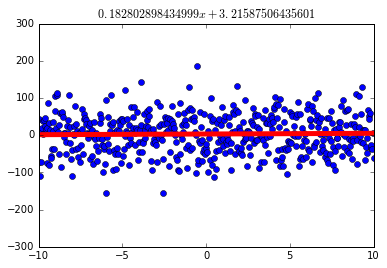

In [21]:
interact_with_plot()

In [22]:
class FitFunction():
    def __init__(self):
        pass
    def __str__(self):
        

IndentationError: expected an indented block (<ipython-input-22-61010c4cab39>, line 5)

In [ ]:
class FunctionalModel(object):
    def __intit__(self,file_path=None,**options):
        defaults={"parameters":None,"variables":None,"equation":None}
        self.options
        for key,value in defaults.iteritems():
            
    def set_parameters(**parameter_dictionary):
        """Sets the parameters to the value specified by the dictionary"""
        
    def fit_data(self,x_data,y_data,**options):
        
    

In [ ]:
re.split("\s+","x pi lamda omega")

In [ ]:
sympy.symbols("m x b")

In [ ]:
# for parameter in se
parameters=re.split("\s+","m b")
varaibles=re.split("\s+","x")
parameter_symbols=sympy.symbols(parameters)
variable_symbols=sympy.symbols(varaibles)

In [ ]:
parameter_symbols[0]

In [ ]:
variable_symbols

In [ ]:
for index,parameter in enumerate(parameters):
    globals()[parameter]=parameter_symbols[index]
equation=m*x+b

In [ ]:
equation

In [ ]:
expanded_uncertainty=[]
for parameter in parameter_symbols:
    expanded_uncertainty.append(sympy.diff(equation,parameter))

In [ ]:
expanded_uncertainty

# How to set the equation ...


In [ ]:
exec("equation2=m*x+b")

In [ ]:
globals()["equation2"]

In [78]:
class FunctionalModel(object):
    def __init__(self,**options):
        defaults= {"parameters":None,"variables":None,"equation":None,"parameter_values":{}}
        self.options={}
        for key,value in defaults.iteritems():
            self.options[key]=value
        for key,value in options.iteritems():
            self.options[key]=value
        # fix any lists 
        for item in ["parameters","variables"]:
            if type(self.options[item]) is StringType:
                self.options[item]=re.split("\s+",self.options[item])
            self.__dict__[item]=self.options[item]
            self.__dict__[item+"_symbols"]=sympy.symbols(self.options[item])
            # this creates the python variables in the global namespace, may back fire with lots of variables
            for index,symbol in enumerate(self.__dict__[item+"_symbols"][:]):
                globals()[item[index]]=symbol
            self.options[item]=None
        self.equation=sympy.sympify(self.options["equation"])
        self.function=sympy.lambdify(self.parameters+self.variables,self.equation,'numpy')
        self.parameter_values=self.options["parameter_values"]
        self.options["parameter_values"]={}
        
    def set_parameters(self,parameter_dictionary):
        """Sets the parameters to values in dictionary"""
        self.parameter_values=parameter_dictionary
        self.function=sympy.lambdify(self.variables,self.equation.subs(self.parameter_values),'numpy')
        
            
    def clear_parameters(self):
        """Clears the parmeters specified by set_parameters"""
        self.function=sympy.lambdify(self.parameters+self.variables,self.equation,'numpy')
        self.parameter_values={}
        
    def fit_data(self,x_data,y_data,**options):
        defaults= {"initial_guess":{parameter:0 for parameter in self.parameters},"fixed_parameters":None}
        self.fit_options={}
        for key,value in defaults.iteritems():
            self.fit_options[key]=value
        for key,value in options.iteritems():
            self.fit_options[key]=value
        
        def fit_f(a,x):
            self.clear_parameters()
            input_list=[]
            for parameter in a:
                input_list.append(parameter)
            input_list.append(x)
            return self.function(*input_list)
        # this needs to be reflected in fit_parameters
        a0=[]
        for key in self.parameters[:]:
            a0.append(self.fit_options["initial_guess"][key])
        result=fit(fit_f,x_list,y_data,a0)
        fit_parameters=result.tolist()
        fit_parameter_dictionary={parameter:fit_parameters[index] for index,parameter in enumerate(self.parameters)}
        self.set_parameters(fit_parameter_dictionary)
        
    

In [79]:
f=FunctionalModel(variables="x",parameters="m b", equation="m*x+b")

In [62]:
globals()["x"]=1

In [80]:
f.function(m=4,b=2.55,x=np.array([0,1,2,3]))



array([  2.55,   6.55,  10.55,  14.55])

In [46]:
f.variables_symbols

In [65]:
#f.function(*[4,2.55,np.array([0,1,2,3])])
def fit_f(a,x):
    f.clear_parameters()
    input_list=[]
    for parameter in a:
        input_list.append(parameter)
    input_list.append(x)
    return f.function(*input_list)


In [26]:
f.set_parameters({"m":2.67,"b":5.1})

In [27]:
f.function(x=np.array([0,1,2,3]))

array([  5.1 ,   7.77,  10.44,  13.11])

In [ ]:
f.function

In [ ]:
f.parameter_values

In [ ]:
f.parameters

In [ ]:
f.variables

In [81]:
def fit(function,xdata,ydata,a0):
    "Fit returns a least square fit "
    error_function=lambda a, xdata, ydata:function(a,xdata)-ydata
    a,success=so.leastsq(error_function, a0,args=(xdata,ydata))
    return a

# Define a linear function
def line_function(a,x):
    "line function (y=a[1]x+a[0])"
    return a[1]*x+a[0]
x_list=np.linspace(-100,100,1000)
y_data=[2.67*x+5.1+random.gauss(0,20) for x in x_list]
results=fit(line_function,x_list,y_data,[1,0])
results2=fit(fit_f,x_list,y_data,[1,0])

In [ ]:
results

In [68]:
results2

array([ 2.65484064,  6.20910762])

In [ ]:
fit_parameter=results2.tolist()

In [ ]:
parameter_dictionary={parameter:fit_parameter[index] for index,parameter in enumerate(f.parameters)}

In [ ]:
parameter_dictionary

In [ ]:
f.set_parameters(parameter_dictionary)

In [ ]:
f.function(x_data)

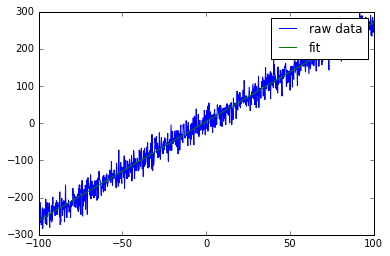

In [84]:
import matplotlib.pyplot as plt
plt.plot(x_list,np.array(y_data),label="raw data")
plt.plot(x_list,f.function(x_list),label="fit")
plt.legend()
plt.show()

In [ ]:
len(y_data)

In [ ]:
len(x_data)

In [82]:
f.fit_data(x_list,y_data)

In [85]:
f.parameter_values

{'b': 4.188287308395738, 'm': 2.6599657222134083}

In [76]:
f.parameters

['m', 'b']

In [77]:
f.parameter_values

{'b': 5.316336207445554, 'm': 2.672140205648869}

In [86]:
print f.equation

b + m*x


In [88]:
f.equation

In [89]:
type(f.equation)

sympy.core.add.Add